In [17]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from math import sin, cos, sqrt, atan2, radians
import warnings

In [18]:
## load up zip code/geocode data
geoData = pd.read_csv('../Data/zipCodeGeoCode.csv', converters={'Zip':str})

In [19]:
geoData.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,05769,Salisbury,VT,43.914026,-73.107030,-5,1,"43.914026, -73.10703"
1,01085,Westfield,MA,42.133642,-72.750290,-5,1,"42.133642, -72.75029"
2,01340,Colrain,MA,42.673371,-72.731040,-5,1,"42.673371, -72.73104"
3,25728,Huntington,WV,38.413384,-82.277401,-5,1,"38.413384, -82.277401"
4,26035,Colliers,WV,40.352943,-80.555850,-5,1,"40.352943, -80.55585"


In [20]:
## load up zip code/geocode data
zipPopAll = pd.read_excel('../Data/2010+Census+Population+By+Zipcode+(ZCTA).xlsx', converters={'Zip Code ZCTA':str})
zipPopAll.head()


,Zip Code ZCTA,2010 Census Population
0,01001,16769.0
1,01002,29049.0
2,01003,10372.0
3,01005,5079.0
4,01007,14649.0


In [21]:
zipPopAll.head()

,Zip Code ZCTA,2010 Census Population
0,01001,16769.0
1,01002,29049.0
2,01003,10372.0
3,01005,5079.0
4,01007,14649.0


In [22]:
len(zipPopAll)

33096

In [23]:
len(geoData)

43191

In [24]:
## find lat/long 
mergeDF = pd.merge(geoData, zipPopAll, left_on='Zip', right_on='Zip Code ZCTA')

In [25]:
mergeDF.head()


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Zip Code ZCTA,2010 Census Population
0,05769,Salisbury,VT,43.914026,-73.10703,-5,1,"43.914026, -73.10703",05769,1216.0
1,01085,Westfield,MA,42.133642,-72.75029,-5,1,"42.133642, -72.75029",01085,41117.0
2,01340,Colrain,MA,42.673371,-72.73104,-5,1,"42.673371, -72.73104",01340,1701.0
3,26035,Colliers,WV,40.352943,-80.55585,-5,1,"40.352943, -80.55585",26035,2491.0
4,36279,Wellington,AL,33.862349,-85.89512,-6,1,"33.862349, -85.89512",36279,2645.0


In [26]:
geoPop = mergeDF[['Zip', 'City', 'State', 'Latitude', 'Longitude', '2010 Census Population']].copy()

In [27]:
def distanceCalculator(lat1Reactor, long1Reactor, lat2City, long2City):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1Reactor)
    lon1 = radians(long1Reactor)
    lat2 = radians(lat2City)
    lon2 = radians(long2City)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance



In [28]:
## load up latlngplant data
reactor = pd.read_excel('../Data/LatLongPlants.xlsx')
reactor.head()

,Name,City,State,Lat,Long,Open,License Expires,Unnamed: 7,Unnamed: 8,Unnamed: 9,Website
0,"Arkansas Nuclear One, Unit 1",London,AR,35.330898,-93.247162,1974,2034,NaN,NaN,NaN,https://www.nrc.gov/info-finder/reactors/
1,"Arkansas Nuclear One, Unit 2",London,AR,35.330898,-93.247162,1974,2034,NaN,NaN,NaN,NaN
2,Beaver Valley Power Station 1,Shippingport,PA,40.629372,-80.421249,1976,2036,NaN,NaN,NaN,NaN
3,Beaver Valley Power Station 2,Shippingport,PA,40.629372,-80.421249,1976,2036,NaN,NaN,NaN,NaN
4,Braidwood Station 1,Braceville,IL,41.226929,-88.264282,1987,2046,NaN,NaN,NaN,NaN


In [29]:
geoPop.head()
len(geoPop)
reactor_df=reactor[['City','State','Lat','Long']].copy()
reactor_df.drop_duplicates(inplace=True,ignore_index=True)
lat=reactor_df['Lat']
reactor_df

,City,State,Lat,Long
0,London,AR,35.330898,-93.247162
1,Shippingport,PA,40.629372,-80.421249
2,Braceville,IL,41.226929,-88.264282
3,Athens,AL,34.812790,-86.961891
4,Southport,NC,33.921562,-78.020271
5,Byron,IL,42.125408,-89.255959
6,Fulton,MO,38.844391,-91.944656
7,Lusby,MD,38.351631,-76.436172
8,York,SC,34.994110,-81.241982
9,Clinton,IL,40.148060,-88.963928


In [ ]:
#def reactorDistance(popDF, lat1Reactor, long1Reactor):
lat=reactor_df['Lat']
lng=reactor_df['Long']
frames=[]
df_n=pd.DataFrame()
df_o=pd.DataFrame()
for i in range(len(reactor)-1):
    for index, row in geoPop.iterrows():
     #     warnings.filterwarnings('ignore')
        lat1Reactor=lat[i]
        long1Reactor=lng[i]
        lat2City = row['Latitude']
        long2City = row['Longitude']
        dist = distanceCalculator(lat1Reactor, long1Reactor, lat2City, long2City)
        geoPop.loc[index, 'Distance from Reactor'] = dist
        geoPop.loc[index, 'Reactor_lat']=lat1Reactor
        geoPop.loc[index, 'Reactor_lng']=long1Reactor
    geoPop.sort_values(by='Distance from Reactor', inplace=True)
    df_o=geoPop[geoPop['Distance from Reactor']<=241.402]
    frames.append(df_o)
    #df_n.append(df_o)
    geoPop=geoPop[geoPop['Distance from Reactor']>241.402]
    print(f"{i}      {lat1Reactor}     {long1Reactor}")
    
    #print(i)
    #print(df_o)
    #print(df_n)
    #df_n=df_n+df_o
    i=i+1
    


In [107]:
len(frames)

55

In [108]:
df = pd.concat(frames)
df

,Zip,City,State,Latitude,Longitude,2010 Census Population,Distance from Reactor,Reactor_lat,Reactor_lng
16495,72847,London,AR,35.380528,-93.28528,2850.0,6.513935,35.330898,-93.247162
31050,72835,Delaware,AR,35.299773,-93.35469,923.0,10.355282,35.330898,-93.247162
9999,72845,Knoxville,AR,35.376739,-93.35706,1216.0,11.197992,35.330898,-93.247162
7511,72801,Russellville,AR,35.278429,-93.13682,18685.0,11.592383,35.330898,-93.247162
30417,72802,Russellville,AR,35.308848,-93.10909,20973.0,12.768701,35.330898,-93.247162
...,...,...,...,...,...,...,...,...,...
21667,74131,Tulsa,OK,36.057536,-96.07119,2775.0,239.458292,38.194569,-95.744698
16861,74133,Tulsa,OK,36.043090,-95.88417,43414.0,239.628052,38.194569,-95.744698
18061,74132,Tulsa,OK,36.051893,-96.02752,7543.0,239.645362,38.194569,-95.744698
24976,67035,Cunningham,KS,37.655003,-98.39643,970.0,240.269289,38.194569,-95.744698


Text(0, 0.5, 'Population')

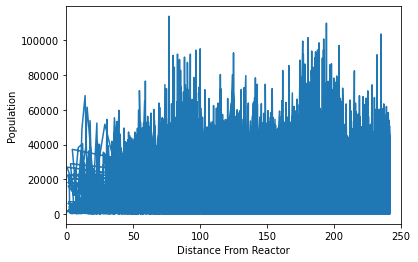

In [112]:
plt.plot(df['Distance from Reactor'], df['2010 Census Population'])
        
plt.xlim(0,250 )
plt.xlabel('Distance From Reactor')
plt.ylabel('Population')

In [1]:
df['2010 Census Population'].sum()

NameError: name 'df' is not defined